In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import sem, t
from scipy import mean
from matplotlib import colors as mcolors
from scipy import stats
from scipy.stats import wilcoxon

%matplotlib inline 

In [2]:
df_naive = pd.read_csv("results/accuracy_naive")
df_knn = pd.read_csv("results/accuracy_knn")

df_naive.rename(columns={'acc':'Acurácia Naive Bayes'},                     
                 inplace=True)

df_knn.rename(columns={'acc':'Acurácia KNN'},                     
                 inplace=True)

del(df_naive['Unnamed: 0'])
del(df_knn['Unnamed: 0'])

In [3]:
naive = df_naive['Acurácia Naive Bayes'].apply(lambda x: np.round(x, 2)).values
knn = df_knn['Acurácia KNN'].apply(lambda x: np.round(x, 2)).values

# Gráfico com acurácias do Naive e o KNN

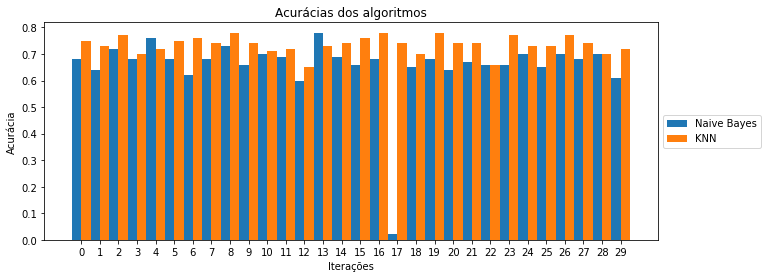

In [4]:

ind = np.arange(0,30)  # the x locations for the groups
width = 0.50  # the width of the bars

fig, ax = plt.subplots()
fig = fig.set_size_inches(11, 4, forward=True)


rects1 = ax.bar(ind - width/2, naive, width,
                label='Naive Bayes')
rects2 = ax.bar(ind + width/2, knn, width,
                label='KNN')

ax.set_ylabel('Acurácia')
ax.set_xlabel('Iterações')
ax.set_title('Acurácias dos algoritmos')
ax.set_xticks(ind)
ax.set_xticklabels(range(0,30))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

        
plt.show()   


In [5]:
data_all = pd.concat([df_naive, df_knn], axis=1)

In [6]:
data_all.index.name = "iteração"

In [7]:
data_all['Diferença (Naive - KNN)'] = list(map(lambda x, y:np.round(x-y, 3), data_all['Acurácia Naive Bayes'].values, data_all['Acurácia KNN'].values))

In [8]:
data_all

,Acurácia Naive Bayes,Acurácia KNN,Diferença (Naive - KNN)
iteração,,,
0,0.685,0.750,-0.065
1,0.640,0.730,-0.090
2,0.725,0.770,-0.045
3,0.675,0.695,-0.020
4,0.760,0.720,0.040
5,0.685,0.750,-0.065
6,0.625,0.760,-0.135
7,0.685,0.745,-0.060
8,0.730,0.780,-0.050


# Intervalo de confiança para as médias de acurácia do Naive Bays

In [9]:
 intervalo_naive =  stats.norm.interval(0.95,  loc=np.mean(df_naive), scale= np.std(df_naive)/np.sqrt(30))

print("Limite inferior: {} \nLimite superior: {}".format(np.round(intervalo_naive[0][0], 3), np.round(intervalo_naive[1][0], 3)))


Limite inferior: 0.612 
Limite superior: 0.701


# Intervalo de confiança para as médias de acurácia do KNN

In [10]:
 intervalo_knn =  stats.norm.interval(0.95, np.mean(df_knn), np.std(df_knn)/np.sqrt(30))

print("Limite inferior: {} \nLimite superior: {}".format(np.round(intervalo_knn[0][0], 3), np.round(intervalo_knn[1][0], 3)))

Limite inferior: 0.725 
Limite superior: 0.747


# Teste wilcoxon

In [11]:
test = wilcoxon(naive, knn)

In [12]:
[test.pvalue, test.statistic]

[1.6391351437999527e-05, 14.0]

In [13]:
pd.DataFrame([[test.pvalue, test.statistic]], index=None, columns=['P-value', 'Statistic'])

,P-value,Statistic
0,0.000016,14.0



* Hipótese nula (H 0 ) : A diferença entre os pares de acurácia segue uma distribuição simétrica em torno de zero.

* Hipótese alternativa (H A ) : A diferença entre os pares de acurácia não segue uma distribuição simétrica em torno de zero.

# Interpretação dos resultados

* Um teste Wilcoxon T foi usado para analisar a acurácia com o Naive Bayes e depois com o KNN após aplicar o KNN verificou-se uma melhoria significativa na acurácia que passou de 0.65 para 0.73 com o KNN. houve diminuição estatisticamente significante da acurácia (t = 14.0, p = 0	0.000016), com esses resultados é rejeitada a hipótese nula (H0), pois o p-values foi menor que 0.05

# Resultado com Cros validation

In [2]:
df_naive = pd.read_csv("results/accuracy_naive_cros")
df_knn = pd.read_csv("results/accuracy_knn_cros")

df_naive.rename(columns={'acc':'Acurácia Naive Bayes'},                     
                 inplace=True)

df_knn.rename(columns={'acc':'Acurácia KNN'},                     
                 inplace=True)

del(df_naive['Unnamed: 0'])
del(df_knn['Unnamed: 0'])

In [3]:
naive = df_naive['Acurácia Naive Bayes'].apply(lambda x: np.round(x, 2)).values
knn = df_knn['Acurácia KNN'].apply(lambda x: np.round(x, 2)).values

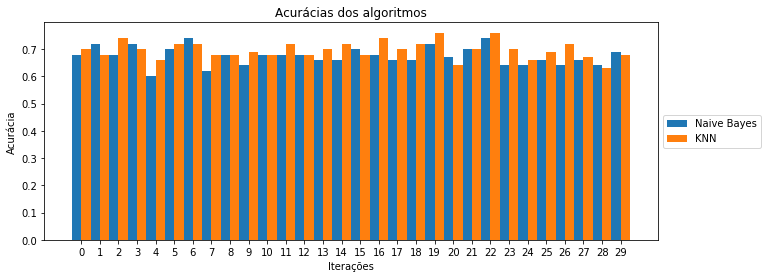

In [4]:

ind = np.arange(0,30)  # the x locations for the groups
width = 0.50  # the width of the bars

fig, ax = plt.subplots()
fig = fig.set_size_inches(11, 4, forward=True)


rects1 = ax.bar(ind - width/2, naive, width,
                label='Naive Bayes')
rects2 = ax.bar(ind + width/2, knn, width,
                label='KNN')

ax.set_ylabel('Acurácia')
ax.set_xlabel('Iterações')
ax.set_title('Acurácias dos algoritmos')
ax.set_xticks(ind)
ax.set_xticklabels(range(0,30))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

        
plt.show()   


In [5]:
 intervalo_naive =  stats.norm.interval(0.95,  loc=np.mean(df_naive), scale= np.std(df_naive)/np.sqrt(30))

print("Limite inferior: {} \nLimite superior: {}".format(np.round(intervalo_naive[0][0], 3), np.round(intervalo_naive[1][0], 3)))


Limite inferior: 0.661 
Limite superior: 0.685


In [6]:
 intervalo_knn =  stats.norm.interval(0.95, np.mean(df_knn), np.std(df_knn)/np.sqrt(30))

print("Limite inferior: {} \nLimite superior: {}".format(np.round(intervalo_knn[0][0], 3), np.round(intervalo_knn[1][0], 3)))

Limite inferior: 0.687 
Limite superior: 0.709


In [8]:
test = wilcoxon(naive, knn)
pd.DataFrame([[test.pvalue, test.statistic]], index=None, columns=['P-value', 'Statistic'])

,P-value,Statistic
0,0.001465,50.5
